In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np 
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

In [4]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv', delimiter=",")

In [5]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [8]:
df.Drug.value_counts()

Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

In [11]:
le = LabelEncoder()
df["Sex"] = le.fit_transform(df["Sex"])
df["BP"] = le.fit_transform(df["BP"])
df["Cholesterol"] = le.fit_transform(df["Cholesterol"])
df["Drug"] = le.fit_transform(df["Drug"])

In [12]:
y = df["Drug"] 
X = df.drop("Drug", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =5) 

sc = StandardScaler() 
X_train[["Na_to_K"]] = sc.fit_transform(X_train[["Na_to_K"]]) 
X_test[["Na_to_K"]] = sc.transform(X_test[["Na_to_K"]]) 

In [14]:
dt = DecisionTreeClassifier() 
dt.fit(X_train, y_train) #
pred_dt = dt.predict(X_test) 
print("Decision Tree accuracy:", accuracy_score(y_test, pred_dt)) 
print(classification_report(y_test, pred_dt))

Decision Tree accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00        22

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



[Text(0.625, 0.9, 'x[4] <= -0.13\ngini = 0.701\nsamples = 160\nvalue = [20, 12, 12, 47, 69]'),
 Text(0.5, 0.7, 'x[2] <= 0.5\ngini = 0.65\nsamples = 91\nvalue = [20, 12, 12, 47, 0]'),
 Text(0.25, 0.5, 'x[0] <= 50.5\ngini = 0.469\nsamples = 32\nvalue = [20, 12, 0, 0, 0]'),
 Text(0.125, 0.3, 'gini = 0.0\nsamples = 20\nvalue = [20, 0, 0, 0, 0]'),
 Text(0.375, 0.3, 'gini = 0.0\nsamples = 12\nvalue = [0, 12, 0, 0, 0]'),
 Text(0.75, 0.5, 'x[3] <= 0.5\ngini = 0.324\nsamples = 59\nvalue = [0, 0, 12, 47, 0]'),
 Text(0.625, 0.3, 'x[2] <= 1.5\ngini = 0.49\nsamples = 28\nvalue = [0, 0, 12, 16, 0]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 12\nvalue = [0, 0, 12, 0, 0]'),
 Text(0.75, 0.1, 'gini = 0.0\nsamples = 16\nvalue = [0, 0, 0, 16, 0]'),
 Text(0.875, 0.3, 'gini = 0.0\nsamples = 31\nvalue = [0, 0, 0, 31, 0]'),
 Text(0.75, 0.7, 'gini = 0.0\nsamples = 69\nvalue = [0, 0, 0, 0, 69]')]

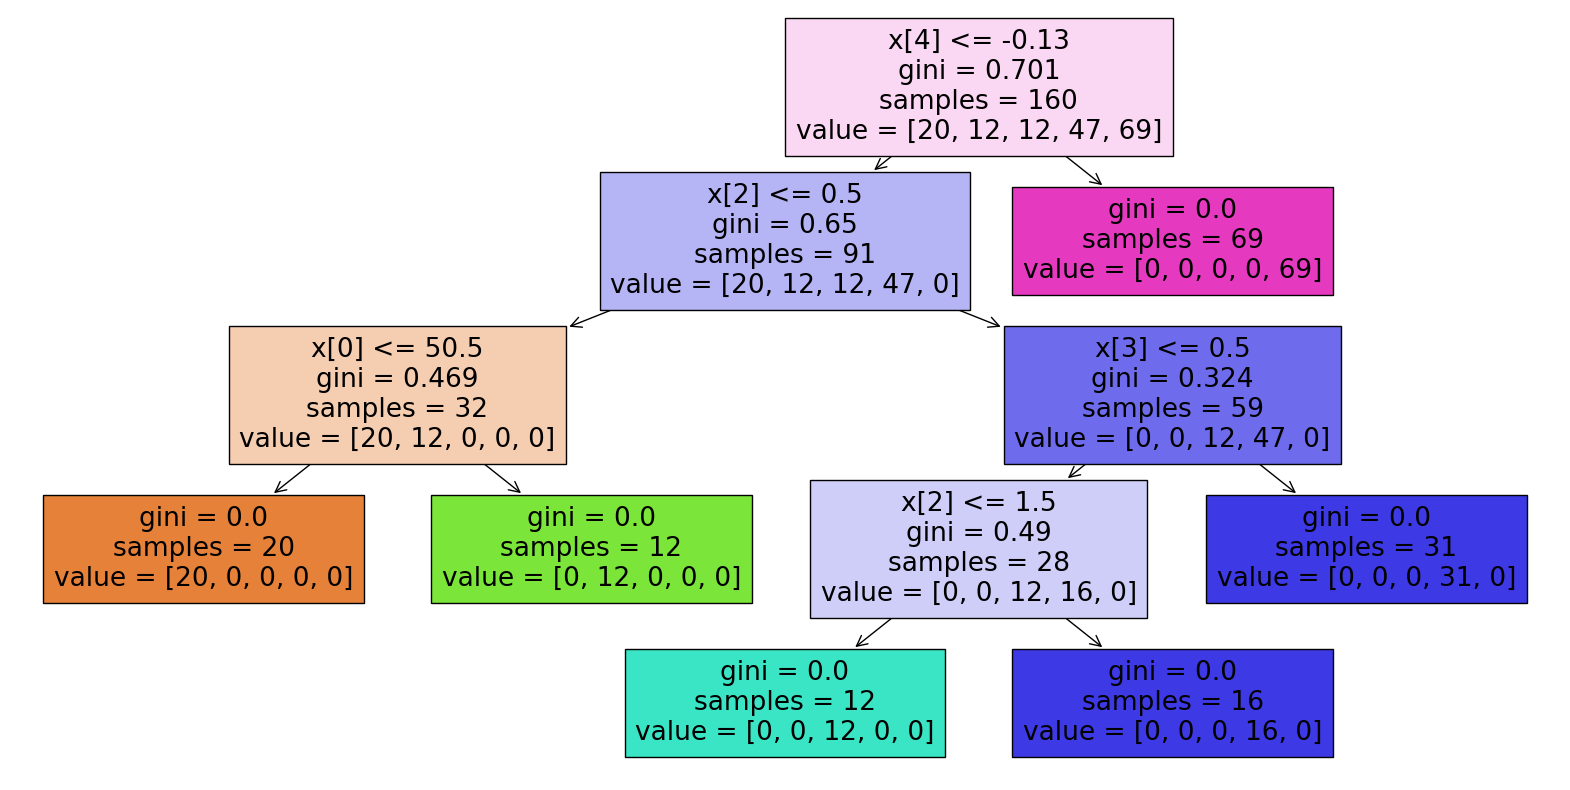

In [15]:
from sklearn import tree
plt.figure(figsize=(20,10))
tree.plot_tree(dt, filled=True)